In [0]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv('mauna_loa.csv')
df.head()

,year,month,day,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800
0,1974,5,19,1974.3795,333.34,6,-999.99,-999.99,50.36
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06
2,1974,6,2,1974.4178,332.32,5,-999.99,-999.99,49.57
3,1974,6,9,1974.4370,332.18,7,-999.99,-999.99,49.63
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.07


In [0]:
#  Join columns year, month, day into one
df['date'] = pd.to_datetime( df[ ['year', 'month', 'day'] ] )  

In [0]:
#  Going through all the values ​​and returning nan if x < 0, otherwise return 
df['ppm_fixed'] = df['ppm'].map(lambda x: np.nan if x < 0 else x)
df['ppm_fixed'].fillna(method='backfill', inplace=True)

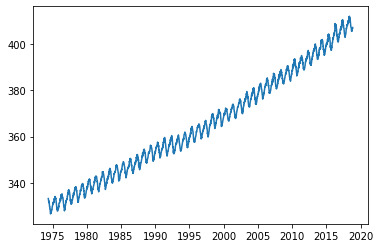

In [0]:
plt.plot( df.date, df.ppm_fixed );

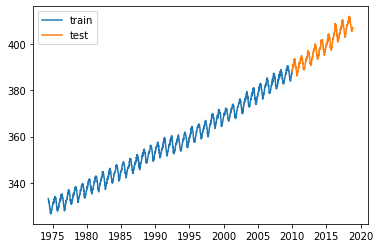

In [0]:
train = df[ df.year < 2010 ]
test = df[ df.year >= 2010 ]

plt.plot( train.date, train.ppm_fixed, label='train' );
plt.plot( test.date, test.ppm_fixed, label='test' )
plt.legend();

## **Prophet**

In [0]:
fb_df = train [ [ 'date', 'ppm_fixed' ] ].copy()
fb_df.columns = ['ds', 'y']

fb_df.head()

,ds,y
0,1974-05-19,333.34
1,1974-05-26,332.95
2,1974-06-02,332.32
3,1974-06-09,332.18
4,1974-06-16,332.37


In [0]:
m = Prophet()
m.fit(fb_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
len(test)

462

In [0]:
future = m.make_future_dataframe(periods=len(test), freq='W', include_history=False)
future.tail()

,ds
457,2018-10-07
458,2018-10-14
459,2018-10-21
460,2018-10-28
461,2018-11-04


#  **Forecasting from 2010 to 2018**

In [0]:
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-03,388.641156,387.947383,388.968231,388.641156,388.641156,-0.172904,-0.172904,-0.172904,-0.172904,-0.172904,-0.172904,0.0,0.0,0.0,388.468252
1,2010-01-10,388.679144,388.192959,389.260328,388.679144,388.679144,0.020884,0.020884,0.020884,0.020884,0.020884,0.020884,0.0,0.0,0.0,388.700029
2,2010-01-17,388.717133,388.436972,389.471915,388.717133,388.717133,0.204730,0.204730,0.204730,0.204730,0.204730,0.204730,0.0,0.0,0.0,388.921863
3,2010-01-24,388.755121,388.591539,389.659830,388.755121,388.755121,0.366814,0.366814,0.366814,0.366814,0.366814,0.366814,0.0,0.0,0.0,389.121935
4,2010-01-31,388.793109,388.775760,389.807008,388.793109,388.793109,0.503869,0.503869,0.503869,0.503869,0.503869,0.503869,0.0,0.0,0.0,389.296978


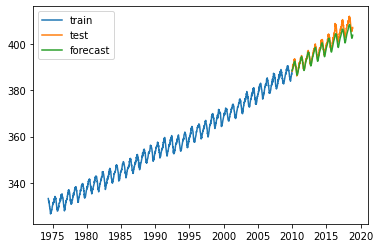

In [0]:
plt.plot( train.date, train.ppm_fixed, label='train' );
plt.plot( test.date, test.ppm_fixed, label='test' );
plt.plot( test.date, forecast.yhat, label='forecast' );
plt.legend();

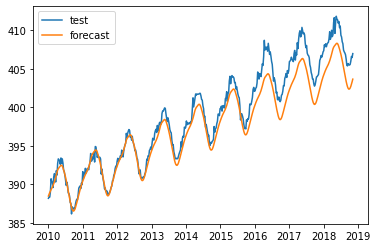

In [0]:
plt.plot( test.date, test.ppm_fixed, label='test' );
plt.plot( test.date, forecast.yhat, label='forecast' );
plt.legend();

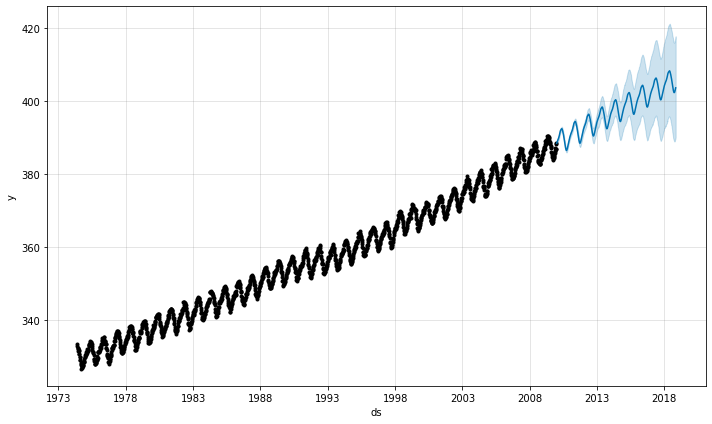

In [0]:
#  The uncertainty range increases over time
m.plot(forecast);

# **Forecasting the year ahead**

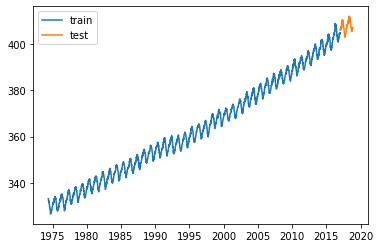

In [0]:
cut_year = 2017
train = df[ df.year < cut_year ]
test = df[ df.year >= cut_year ]

plt.plot( train.date, train.ppm_fixed, label='train' );
plt.plot( test.date, test.ppm_fixed, label='test' )
plt.legend();

In [0]:
fb_df = train [ [ 'date', 'ppm_fixed' ] ].copy()
fb_df.columns = ['ds', 'y']

fb_df.head()

,ds,y
0,1974-05-19,333.34
1,1974-05-26,332.95
2,1974-06-02,332.32
3,1974-06-09,332.18
4,1974-06-16,332.37


In [0]:
m = Prophet()
m.fit(fb_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
len(test)

97

In [0]:
future = m.make_future_dataframe(periods=len(test), freq='W', include_history=False)
future.tail()

,ds
92,2018-10-07
93,2018-10-14
94,2018-10-21
95,2018-10-28
96,2018-11-04


In [0]:
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,404.624317,403.847434,404.983469,404.624317,404.624317,-0.220683,-0.220683,-0.220683,-0.220683,-0.220683,-0.220683,0.0,0.0,0.0,404.403634
1,2017-01-08,404.668236,404.020451,405.225475,404.668236,404.668236,-0.043853,-0.043853,-0.043853,-0.043853,-0.043853,-0.043853,0.0,0.0,0.0,404.624383
2,2017-01-15,404.712156,404.284858,405.433832,404.712156,404.712156,0.142774,0.142774,0.142774,0.142774,0.142774,0.142774,0.0,0.0,0.0,404.854930
3,2017-01-22,404.756075,404.504436,405.646921,404.756075,404.756075,0.326056,0.326056,0.326056,0.326056,0.326056,0.326056,0.0,0.0,0.0,405.082131
4,2017-01-29,404.799994,404.681906,405.830813,404.799994,404.799994,0.481372,0.481372,0.481372,0.481372,0.481372,0.481372,0.0,0.0,0.0,405.281367


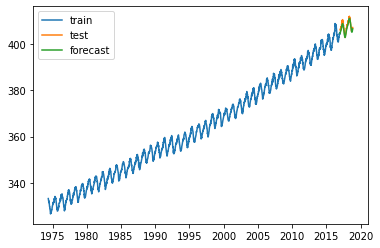

In [0]:
plt.plot( train.date, train.ppm_fixed, label='train' );
plt.plot( test.date, test.ppm_fixed, label='test' );
plt.plot( test.date, forecast.yhat, label='forecast' );
plt.legend();

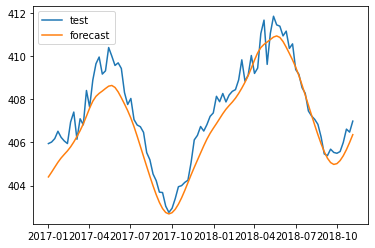

In [0]:
plt.plot( test.date, test.ppm_fixed, label='test' );
plt.plot( test.date, forecast.yhat, label='forecast' );
plt.legend();

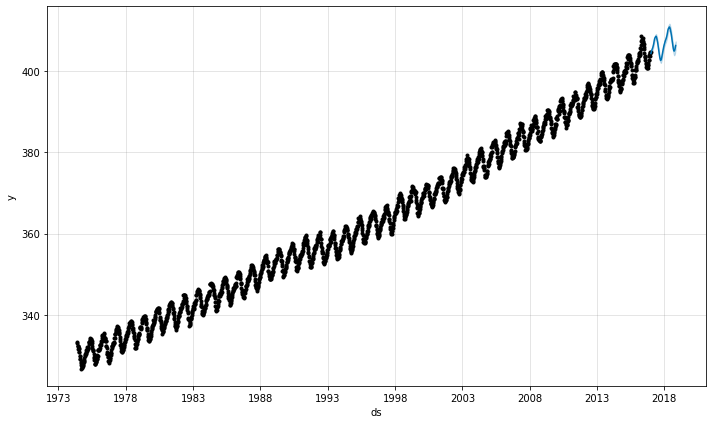

In [0]:
m.plot(forecast);